In [53]:

#/intership_2022/ml/project_work/LogisticRegression

In [54]:
from sklearn.datasets import load_digits
#Load and return the digits dataset (classification).
#Each datapoint is a 8x8 image of a digit.
import numpy as np

In [55]:
digits= load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [56]:
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [57]:
print(digits.images[24])

[[ 0.  0.  0.  0. 12.  2.  0.  0.]
 [ 0.  0.  0.  6. 14.  1.  0.  0.]
 [ 0.  0.  4. 16.  7.  8.  0.  0.]
 [ 0.  0. 13.  9.  0. 16.  6.  0.]
 [ 0.  6. 16. 10. 11. 16.  0.  0.]
 [ 0.  0.  5. 10. 13. 16.  0.  0.]
 [ 0.  0.  0.  0.  6. 16.  0.  0.]
 [ 0.  0.  0.  0. 12.  8.  0.  0.]]


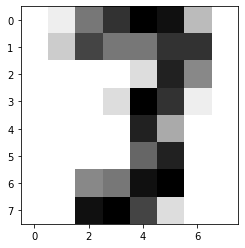

In [81]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[23],cmap='binary')

In [82]:
print(digits.target[23])

3


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [61]:
x_train

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  5., 16., ...,  6.,  1.,  0.],
       [ 0.,  0.,  4., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(x_train)
Xtest = sc.transform (x_test)
print(Xtrain)

[[ 0.         -0.34658389 -0.67111503 ... -1.15783495 -0.50770266
  -0.19895848]
 [ 0.          5.19793507  2.23828434 ... -0.13881915 -0.26774635
  -0.19895848]
 [ 0.         -0.34658389 -0.25548655 ... -0.81816302 -0.50770266
  -0.19895848]
 ...
 [ 0.         -0.34658389  0.78358465 ...  1.55954051 -0.02779004
  -0.19895848]
 [ 0.         -0.34658389 -0.87892927 ... -1.15783495 -0.50770266
  -0.19895848]
 [ 0.         -0.34658389 -0.87892927 ... -0.98799898 -0.50770266
  -0.19895848]]


In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42).fit(Xtrain, y_train)
predictions = log_reg.predict(Xtest)

In [64]:
# Use score method to get accuracy of model
score = log_reg.score(Xtest, y_test)
print(score)

0.9711111111111111


In [83]:
single_test = digits.images[23].reshape(1,-1)
prediction = log_reg.predict(single_test)
print(prediction[0])
print(prediction)

3
[3]


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [67]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


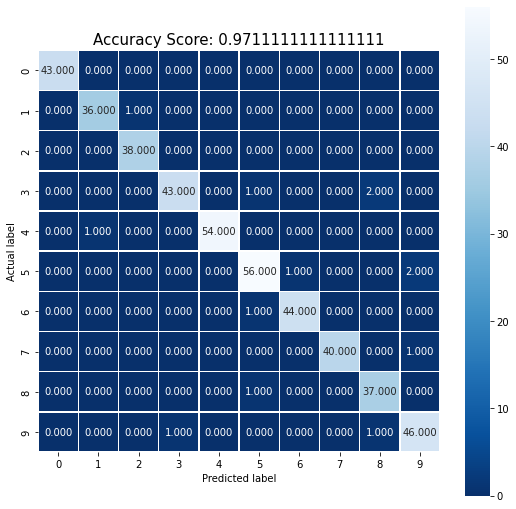

In [68]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [69]:
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow

In [70]:
img = Image.fromarray(digits.images[24],'L')
img.save('my1.png')

In [71]:
img_T = cv.imread('/content/my1.png')
image = cv.cvtColor(img_T, cv.COLOR_BGR2GRAY)
plt.imsave('my2.png',image)
i=cv.imread('/content/my2.png')

In [72]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(log_reg,open('/content/drive/My Drive//intership_2022/ml/project_work/LogisticRegression/model.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [74]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
!ngrok authtoken 2CT4L1Qz5Kjm1ApbwHixPZkJ9cv_5pCAaY2RemGBmeLEvc2yc

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [92]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
pickle_in = open("/content/drive/MyDrive/intership_2022/ml/project_work/LogisticRegression/model.pkl","rb")
model= pickle.load(pickle_in)

html_temp = """
    <div class="" style="background-color:blue;">
    <div class="clearfix">
    <div class="col-md-12">
    <center><p style="font-size:40px;color:white;margin-top:10px;">Workshop on </p></center>
    <center><p style="font-size:40px;color:white;margin-top:10px;">Artificial Intelligence & Data Science </p></center>
    </div>
    </div>
    </div>
    """
st.markdown(html_temp,unsafe_allow_html=True)
st.title("""
        Digit Recognition
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  single_test = image_data[:, :, 0]
  single_test = single_test.reshape(1,-1)
  prediction = model.predict(single_test)
  print(prediction[0]) 
  #image_resized = cv2.resize(image_data, (8, 8))  
  #prediction = model.predict(image_resized.reshape(1,-1))
  #print('Prediction Score:\n',prediction[0])
  #thresholded = (prediction>0.5)*1
  #print('\nThresholded Score:\n',thresholded[0])
  #print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])
  #digit = np.where(thresholded == 1)[1][0]
  #st.image(image_data, use_column_width=True)
  return prediction
if file is None:
  st.text("Please upload an Image file")
else:
  image=Image.open(file)
  image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict Digit"):
  result=import_and_predict(image)
  st.success('Model has predicted the image is of  {}'.format(result))
if st.button("About"):
  st.header("Ishu kumar")
  st.subheader("Department of Computer Engineering")
  
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:20px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [78]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [90]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://36c4-35-233-165-84.ngrok.io" -> "http://localhost:80">

In [91]:
!streamlit run --server.port 80 app.py

2022-08-01 03:11:53.914 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.233.165.84:80

2
  Stopping...
  Stopping...
